c:\Users\Ashutosh Khairnar\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 28s 14ms/step - accuracy: 0.4370 - loss: 1.5567 - val_accuracy: 0.6807 - val_loss: 0.9394
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 27s 14ms/step - accuracy: 0.6934 - loss: 0.8913 - val_accuracy: 0.7142 - val_loss: 0.8415
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - accuracy: 0.7252 - loss: 0.7874 - val_accuracy: 0.7201 - val_loss: 0.7828
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 27s 14ms/step - accuracy: 0.7463 - loss: 0.7248 - val_accuracy: 0.7647 - val_loss: 0.6979
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 27s 15ms/step - accuracy: 0.7652 - loss: 0.6739 - val_accuracy: 0.7681 - val_loss: 0.6656
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 12ms/step - accuracy: 0.7802 - loss: 0.6388 - val_accuracy: 0.7810 - val_loss: 0.6420
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 12ms/step - accuracy: 0.7907 - loss: 0.6063 - val_accuracy: 0.7930 - val_loss: 0.6075
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.7974 -

IndexError: index 9 is out of bounds for axis 0 with size 9

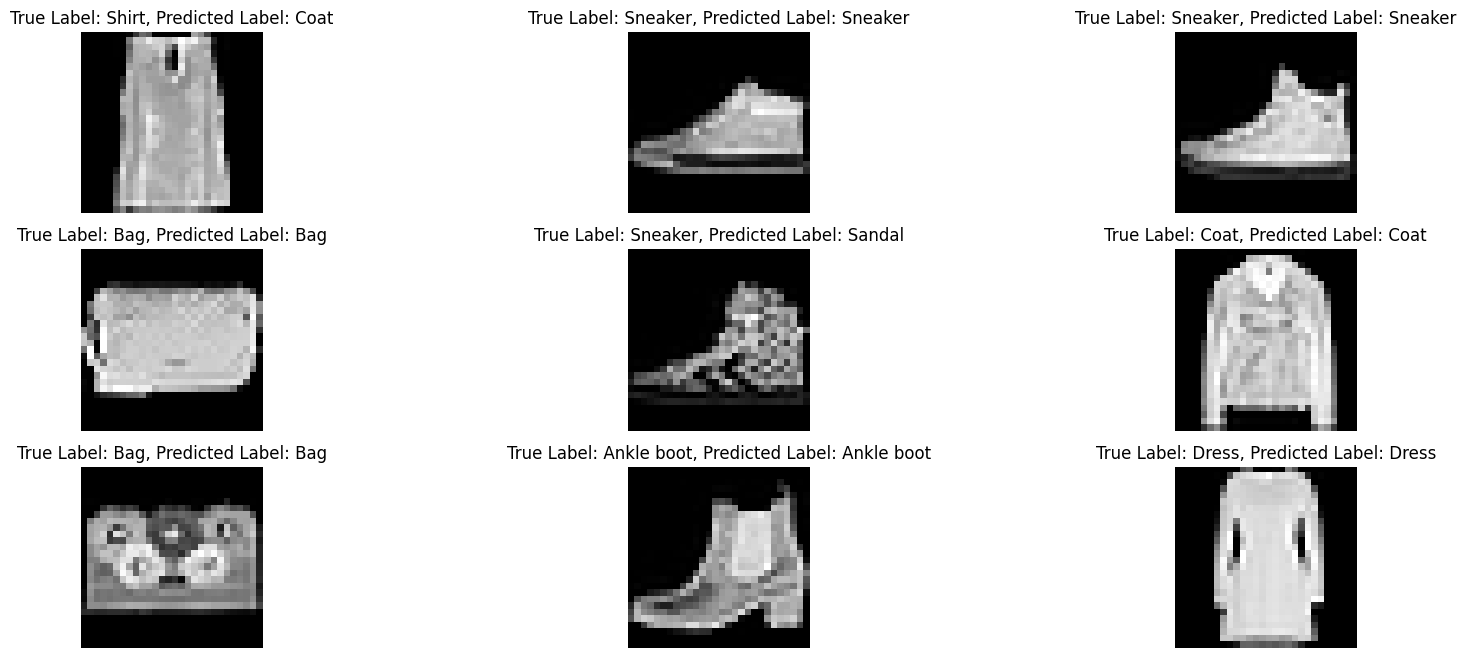

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn import metrics

# Load the Fashion MNIST dataset and split into training and testing sets
(trainX, trainY), (testX, testY) = tf.keras.datasets.fashion_mnist.load_data()

# Reshape the training and testing data and normalize pixel values to a range of [0, 1]
trainX = trainX.reshape(-1, 28, 28, 1) / 255.0
testX = testX.reshape(-1, 28, 28, 1) / 255.0

# Convert labels to categorical one-hot encoding
trainY_cat = tf.keras.utils.to_categorical(trainY)
testY_cat = tf.keras.utils.to_categorical(testY)

# Define the Convolutional Neural Network (CNN) model architecture
model = tf.keras.models.Sequential([
    # Convolutional layer with 64 filters, each of size 3x3
    # Input shape is 28x28x1 (height, width, channels), activation function is ReLU
    # Padding is 'same', which pads the input so the output has the same height/width dimensions
    tf.keras.layers.Conv2D(64, kernel_size=(3, 3), input_shape=(28, 28, 1), activation='relu', padding='same'),
    # Average pooling layer with pool size 2x2, reduces the spatial dimensions by half
    tf.keras.layers.AvgPool2D(pool_size=(2, 2)),
    # Convolutional layer with 32 filters, each of size 3x3, activation function is ReLU
    # Padding is 'same' for consistent input/output dimensions
    tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same'),
    # Average pooling layer with pool size 2x2, reduces the spatial dimensions by half
    tf.keras.layers.AvgPool2D(pool_size=(2, 2)),
    # Global average pooling layer computes the average of each feature map across spatial dimensions
    # Flattens the output into a 1D array for the Dense layer
    tf.keras.layers.GlobalAveragePooling2D(),
    # Fully connected (Dense) layer with 10 neurons (output classes), activation is softmax for classification
    tf.keras.layers.Dense(10, activation="softmax")
])

# Compile the model with categorical cross-entropy loss and Adam optimizer
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model on the training data for 10 epochs, validating on the testing data
history = model.fit(trainX, trainY_cat, epochs=10, validation_data=(testX, testY_cat))

# Evaluate the model on the testing data and calculate accuracy
accuracy = model.evaluate(testX, testY_cat)[1]

# Generate predictions for the testing data
predictions = model.predict(testX)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(testY_cat, axis=1)

# Generate a classification report and confusion matrix for evaluation
classification_report_str = metrics.classification_report(true_labels, predicted_labels)
confusion_matrix_arr = metrics.confusion_matrix(true_labels, predicted_labels)

# Define class names for visualization
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Visualize random predictions from the testing data
random_indices = random.sample(range(len(testX)), 10)

# Create a subplot grid for visualization
fig, axes = plt.subplots(3, 3, figsize=(20, 8))
axes = axes.flatten()

# Iterate over random indices and plot images with true and predicted labels
for i, idx in enumerate(random_indices):
    image = testX[idx]
    label = testY_cat[idx]

    # Make a prediction for the current image
    prediction = model.predict(np.expand_dims(image, axis=0))
    predicted_label = class_names[np.argmax(prediction)]
    true_label = class_names[np.argmax(label)]

    # Plot the image with true and predicted labels
    axes[i].imshow(image.squeeze(), cmap='gray')
    axes[i].set_title(f"True Label: {true_label}, Predicted Label: {predicted_label}")
    axes[i].axis("off")

plt.tight_layout()
plt.show()
